In [1]:
! pip install kaggle

In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload the 'kaggle.json' file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahmoudbakloul","key":"64e70309e8fd9c4dc53f4578f0239351"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d cookiefinder/tomato-disease-multiple-sources

Dataset URL: https://www.kaggle.com/datasets/cookiefinder/tomato-disease-multiple-sources
License(s): CC0-1.0
100% 1.37G/1.37G [00:21<00:00, 61.2MB/s]
100% 1.37G/1.37G [00:21<00:00, 68.5MB/s]


In [7]:
! unzip /content/tomato-disease-multiple-sources.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/Late_blight/9afc2537-1b13-4c25-b5ed-5b8de511b0ab___GHLB2 Leaf 9033.JPG  
  inflating: valid/Late_blight/9bb49d22-976d-40c3-bc9a-bff5cbbd8e28___RS_Late.B 5057.JPG  
  inflating: valid/Late_blight/9c274db5-2f89-4f3c-b9e2-4d5ebc54ddad___GHLB2 Leaf 9096.JPG  
  inflating: valid/Late_blight/9c726f4e-045b-4080-b53d-d7e66d45bcb1___RS_Late.B 4876.JPG  
  inflating: valid/Late_blight/9e5dd34f-124c-4a64-ba9f-77c8d05faa9c___GHLB2 Leaf 8749.JPG  
  inflating: valid/Late_blight/9e633823-3dde-450c-8172-733021e4dff0___RS_Late.B 6414.JPG  
  inflating: valid/Late_blight/9ecb8001-2f48-4487-b287-535dbcfb5c2f___RS_Late.B 6206.JPG  
  inflating: valid/Late_blight/9f7dcd60-e691-4c1e-830e-7495f7cc123d___RS_Late.B 6166.JPG  
  inflating: valid/Late_blight/Bacterial_spots2276_jpg.rf.5becd3793ec2a532bf8f111d60911c63.jpg  
  inflating: valid/Late_blight/IMG_1526_jpg.rf.5e25005985e2b12a6f52bfa7120f3eee.jpg  
  inflating: valid/Late_blight/IMG_

In [8]:
import os

dataset_path = '/content/train'
classes = os.listdir(dataset_path)
print("Available classes in train:", classes)

dataset_path = '/content/valid'
classes = os.listdir(dataset_path)
print("Available classes in valid:", classes)


Available classes in train: ['Spider_mites Two-spotted_spider_mite', 'Leaf_Mold', 'Target_Spot', 'Bacterial_spot', 'Septoria_leaf_spot', 'Late_blight', 'powdery_mildew', 'Tomato_Yellow_Leaf_Curl_Virus', 'Early_blight', 'healthy', 'Tomato_mosaic_virus']
Available classes in valid: ['Spider_mites Two-spotted_spider_mite', 'Leaf_Mold', 'Target_Spot', 'Bacterial_spot', 'Septoria_leaf_spot', 'Late_blight', 'powdery_mildew', 'Tomato_Yellow_Leaf_Curl_Virus', 'Early_blight', 'healthy', 'Tomato_mosaic_virus']


In [9]:
classes_to_delete = ['Early_blight', 'Late_blight','Leaf_Mold','Septoria_leaf_spot','Spider_mites Two-spotted_spider_mite','Tomato_Yellow_Leaf_Curl_Virus','Tomato_mosaic_virus','powdery_mildew']  # Replace with class names you want to delete

for class_name in classes_to_delete:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.exists(class_path):
        # Remove the folder and all its contents
        import shutil
        shutil.rmtree(class_path)
        print(f"Deleted {class_name}")
    else:
        print(f"{class_name} not found in dataset")

dataset_path='/content/train'
for class_name in classes_to_delete:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.exists(class_path):
        # Remove the folder and all its contents
        import shutil
        shutil.rmtree(class_path)
        print(f"Deleted {class_name}")
    else:
        print(f"{class_name} not found in dataset")


Deleted Early_blight
Deleted Late_blight
Deleted Leaf_Mold
Deleted Septoria_leaf_spot
Deleted Spider_mites Two-spotted_spider_mite
Deleted Tomato_Yellow_Leaf_Curl_Virus
Deleted Tomato_mosaic_virus
Deleted powdery_mildew
Deleted Early_blight
Deleted Late_blight
Deleted Leaf_Mold
Deleted Septoria_leaf_spot
Deleted Spider_mites Two-spotted_spider_mite
Deleted Tomato_Yellow_Leaf_Curl_Virus
Deleted Tomato_mosaic_virus
Deleted powdery_mildew


In [10]:
remaining_classes = os.listdir('/content/train')
print("Remaining classes in train:", remaining_classes)

remaining_classes = os.listdir('/content/valid')
print("Remaining classes in valid:", remaining_classes)

Remaining classes in train: ['Target_Spot', 'Bacterial_spot', 'healthy']
Remaining classes in valid: ['Target_Spot', 'Bacterial_spot', 'healthy']


In [11]:
import os
import cv2

# Define dataset paths
data_path = '/content/train'  # Change this to your valid folder if needed
labels = ['Target_Spot', 'healthy', 'Bacterial_spot']

# Function to check and remove corrupted images
def remove_corrupted_images(data_path, labels):
    corrupted_images = []
    for label in labels:
        label_path = os.path.join(data_path, label)
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            try:
                # Try to read the image
                img = cv2.imread(img_path)
                if img is None:
                    raise ValueError("Image is None")

                # Attempt resizing as a further check
                img = cv2.resize(img, (256, 256))
            except Exception as e:
                print(f"Corrupted image found and removed: {img_path} | Error: {e}")
                corrupted_images.append(img_path)
                os.remove(img_path)  # Remove the corrupted image

    # Log the corrupted images
    if corrupted_images:
        print("\nSummary: Deleted corrupted images:")
        for corrupted_image in corrupted_images:
            print(corrupted_image)
    else:
        print("No corrupted images found.")

# Run the function on your dataset
remove_corrupted_images(data_path, labels)



# Define dataset paths
data_path = '/content/valid'  # Change this to your valid folder if needed
labels = ['Target_Spot', 'healthy', 'Bacterial_spot']

# Function to check and remove corrupted images
def remove_corrupted_images(data_path, labels):
    corrupted_images = []
    for label in labels:
        label_path = os.path.join(data_path, label)
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            try:
                # Try to read the image
                img = cv2.imread(img_path)
                if img is None:
                    raise ValueError("Image is None")

                # Attempt resizing as a further check
                img = cv2.resize(img, (256, 256))
            except Exception as e:
                print(f"Corrupted image found and removed: {img_path} | Error: {e}")
                corrupted_images.append(img_path)
                os.remove(img_path)  # Remove the corrupted image

    # Log the corrupted images
    if corrupted_images:
        print("\nSummary: Deleted corrupted images:")
        for corrupted_image in corrupted_images:
            print(corrupted_image)
    else:
        print("No corrupted images found.")

# Run the function on your dataset
remove_corrupted_images(data_path, labels)




No corrupted images found.
Corrupted image found and removed: /content/valid/healthy/HL_(336).png | Error: Image is None

Summary: Deleted corrupted images:
/content/valid/healthy/HL_(336).png


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
img_size = (256, 256)
batch_size = 32

# Initialize the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shearing transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # Fill pixels after transforms
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only normalize validation data

# Load data from the directories
train_generator = train_datagen.flow_from_directory(
    '/content/train',  # Path to train folder
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'  # Use 'sparse' for sparse labels
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/valid',  # Path to validation folder
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)


Found 7704 images belonging to 3 classes.
Found 1994 images belonging to 3 classes.


In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import KFold

# Define a function to create the model
def create_vgg16_model(input_shape=(256, 256, 3), num_classes=3):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the pre-trained layers

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [14]:
from sklearn.model_selection import StratifiedKFold

# Load file paths and labels
def prepare_data_from_generators(generator):
    filepaths = generator.filepaths
    labels = generator.classes
    return np.array(filepaths), np.array(labels)

train_filepaths, train_labels = prepare_data_from_generators(train_generator)

# Initialize Stratified K-Fold
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)


In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# Initialize lists to store results for accuracy, loss, and confusion matrices
all_train_acc = []
all_val_acc = []
all_train_loss = []
all_val_loss = []
confusion_matrices = []

# Lists to store true and predicted labels for all folds
all_val_labels = []
all_val_predictions = []

for fold, (train_idx, val_idx) in enumerate(kf.split(train_filepaths, train_labels)):
    print(f"Training Fold {fold + 1}...")

    # Split the data for the current fold
    fold_train_filepaths = train_filepaths[train_idx]
    fold_train_labels = train_labels[train_idx]
    fold_val_filepaths = train_filepaths[val_idx]
    fold_val_labels = train_labels[val_idx]

    # Convert labels to strings for flow_from_dataframe
    fold_train_labels = fold_train_labels.astype(str)
    fold_val_labels = fold_val_labels.astype(str)

    # Create data generators for the current fold
    fold_train_generator = train_datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': fold_train_filepaths, 'class': fold_train_labels}),
        x_col='filename',
        y_col='class',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse',  # Use 'sparse' for integer labels
        shuffle=True
    )

    fold_val_generator = valid_datagen.flow_from_dataframe(
        dataframe=pd.DataFrame({'filename': fold_val_filepaths, 'class': fold_val_labels}),
        x_col='filename',
        y_col='class',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse',  # Use 'sparse' for integer labels
        shuffle=False
    )

    # Create a new model for this fold
    model = create_vgg16_model()

    # Define callbacks
    checkpoint_dir = f'/content/checkpoints/fold_{fold + 1}'
    os.makedirs(checkpoint_dir, exist_ok=True)
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(filepath=os.path.join(checkpoint_dir, 'best_model.keras'), monitor='val_loss', save_best_only=True),
        LearningRateScheduler(lambda epoch, lr: lr * 0.5 if epoch > 5 else lr)
    ]

    # Train the model for the current fold and get the history
    history = model.fit(
        fold_train_generator,
        validation_data=fold_val_generator,
        epochs=50,
        callbacks=callbacks
    )

    # Collect the data from this fold's history (accuracy and loss for plotting)
    all_train_acc.append(history.history['accuracy'])
    all_val_acc.append(history.history['val_accuracy'])
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

    # Predictions and confusion matrix calculation
    fold_val_predictions = model.predict(fold_val_generator, batch_size=batch_size, verbose=1)
    fold_val_predictions = np.argmax(fold_val_predictions, axis=1)  # Get predicted class labels

    # Convert fold_val_labels back to integers
    fold_val_labels_int = fold_val_labels.astype(int)

    # Save true and predicted labels for this fold
    all_val_labels.append(fold_val_labels_int)
    all_val_predictions.append(fold_val_predictions)

    # Compute confusion matrix
    fold_conf_matrix = confusion_matrix(fold_val_labels_int, fold_val_predictions)
    confusion_matrices.append(fold_conf_matrix)

    print(f"Completed Fold {fold + 1}\n")


Training Fold 1...
Found 5778 validated image filenames belonging to 3 classes.
Found 1926 validated image filenames belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 150s 699ms/step - accuracy: 0.6420 - loss: 1.6305 - val_accuracy: 0.8956 - val_loss: 0.2889 - learning_rate: 0.0010
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 162s 589ms/step - accuracy: 0.8537 - loss: 0.3740 - val_accuracy: 0.9180 - val_loss: 0.2245 - learning_rate: 0.0010
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 111s 588ms/step - accuracy: 0.8666 - loss: 0.3328 - val_accuracy: 0.9418 - val_loss: 0.1591 - learning_rate: 0.0010
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 140s 578ms/step - accuracy: 0.8518 - loss: 0.3577 - val_accuracy: 0.9382 - val_loss: 0.1870 - learning_rate: 0.0010
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 149s 616ms/step - accuracy: 0.8718 - loss: 0.3076 - val_accuracy: 0.9450 - val_loss: 0.1511 - learning_rate: 0.0010
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 137s 588ms/step - accuracy: 0.8687 - loss: 0.3008 - val_accuracy: 0.9507 - val_loss: 0.1370 - learning_rate: 0.0010
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 141s 586ms/step - accuracy: 0.9009 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 114s 597ms/step - accuracy: 0.6518 - loss: 1.5092 - val_accuracy: 0.8853 - val_loss: 0.3088 - learning_rate: 0.0010
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 111s 589ms/step - accuracy: 0.8504 - loss: 0.3847 - val_accuracy: 0.8873 - val_loss: 0.2911 - learning_rate: 0.0010
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 108s 581ms/step - accuracy: 0.8422 - loss: 0.3860 - val_accuracy: 0.9278 - val_loss: 0.2040 - learning_rate: 0.0010
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 109s 584ms/step - accuracy: 0.8621 - loss: 0.3303 - val_accuracy: 0.9367 - val_loss: 0.1804 - learning_rate: 0.0010
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 108s 580ms/step - accuracy: 0.8658 - loss: 0.3047 - val_accuracy: 0.9382 - val_loss: 0.1591 - learning_rate: 0.0010
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 144s 588ms/step - accuracy: 0.8832 - loss: 0.2734 - val_accuracy: 0.9413 - val_loss: 0.1419 - learning_rate: 0.0010
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 108s 581ms/step - accuracy: 0.8805 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 123s 644ms/step - accuracy: 0.6661 - loss: 1.2156 - val_accuracy: 0.9211 - val_loss: 0.2454 - learning_rate: 0.0010
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 128s 577ms/step - accuracy: 0.8598 - loss: 0.3438 - val_accuracy: 0.9008 - val_loss: 0.2597 - learning_rate: 0.0010
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 142s 581ms/step - accuracy: 0.8541 - loss: 0.3619 - val_accuracy: 0.9330 - val_loss: 0.2029 - learning_rate: 0.0010
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 108s 582ms/step - accuracy: 0.8503 - loss: 0.3463 - val_accuracy: 0.9486 - val_loss: 0.1389 - learning_rate: 0.0010
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 141s 575ms/step - accuracy: 0.8863 - loss: 0.2771 - val_accuracy: 0.9585 - val_loss: 0.1402 - learning_rate: 0.0010
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 110s 581ms/step - accuracy: 0.8890 - loss: 0.2802 - val_accuracy: 0.9507 - val_loss: 0.1441 - learning_rate: 0.0010
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 109s 586ms/step - accuracy: 0.9135 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 114s 593ms/step - accuracy: 0.6070 - loss: 2.2197 - val_accuracy: 0.8962 - val_loss: 0.3095 - learning_rate: 0.0010
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 109s 584ms/step - accuracy: 0.8383 - loss: 0.4131 - val_accuracy: 0.9076 - val_loss: 0.2489 - learning_rate: 0.0010
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 151s 636ms/step - accuracy: 0.8643 - loss: 0.3459 - val_accuracy: 0.9299 - val_loss: 0.2254 - learning_rate: 0.0010
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 133s 587ms/step - accuracy: 0.8713 - loss: 0.3064 - val_accuracy: 0.9330 - val_loss: 0.1972 - learning_rate: 0.0010
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 143s 589ms/step - accuracy: 0.8840 - loss: 0.2931 - val_accuracy: 0.9413 - val_loss: 0.1629 - learning_rate: 0.0010
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 151s 636ms/step - accuracy: 0.8698 - loss: 0.3163 - val_accuracy: 0.9444 - val_loss: 0.1600 - learning_rate: 0.0010
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 111s 589ms/step - accuracy: 0.8978 

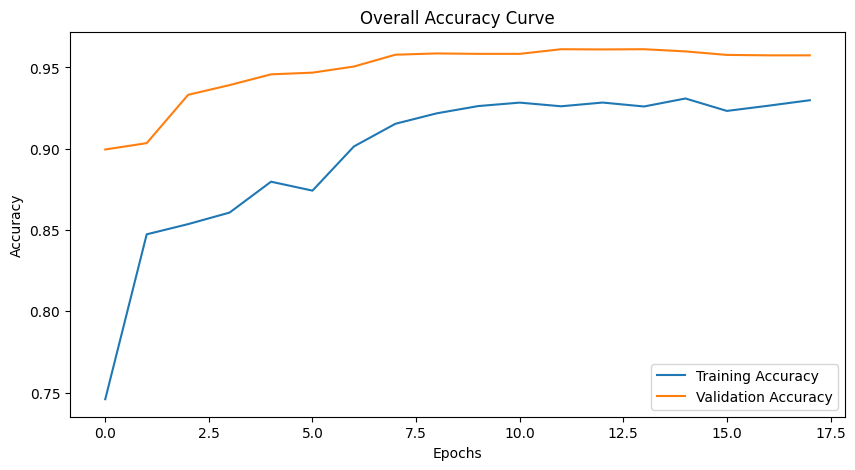

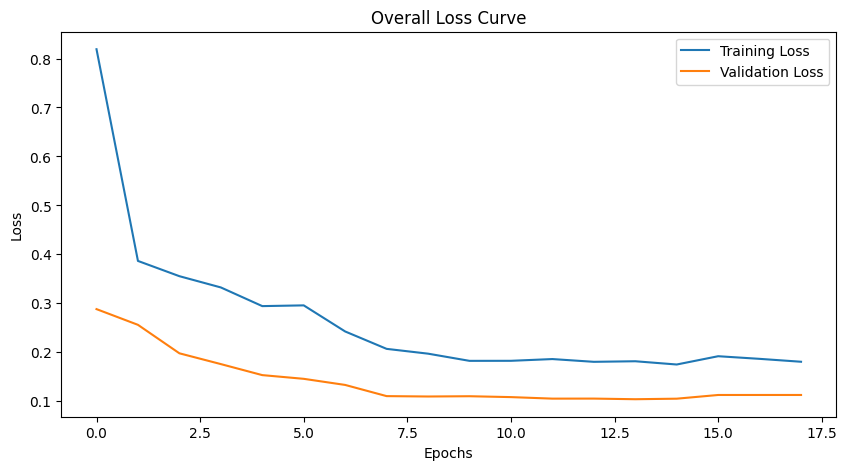

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def pad_sequences(data, pad_value=np.nan):
    """Pad sequences to the same length."""
    max_length = max(len(seq) for seq in data)
    padded_data = np.full((len(data), max_length), pad_value)
    for i, seq in enumerate(data):
        padded_data[i, :len(seq)] = seq
    return padded_data

def plot_overall_curves():
    # Pad the sequences to handle varying lengths
    train_acc_padded = pad_sequences(all_train_acc)
    val_acc_padded = pad_sequences(all_val_acc)
    train_loss_padded = pad_sequences(all_train_loss)
    val_loss_padded = pad_sequences(all_val_loss)

    # Compute the mean ignoring NaNs
    mean_train_acc = np.nanmean(train_acc_padded, axis=0)
    mean_val_acc = np.nanmean(val_acc_padded, axis=0)
    mean_train_loss = np.nanmean(train_loss_padded, axis=0)
    mean_val_loss = np.nanmean(val_loss_padded, axis=0)

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(mean_train_acc, label='Training Accuracy')
    plt.plot(mean_val_acc, label='Validation Accuracy')
    plt.title('Overall Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(mean_train_loss, label='Training Loss')
    plt.plot(mean_val_loss, label='Validation Loss')
    plt.title('Overall Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the function to plot the overall accuracy and loss curves
plot_overall_curves()


Found 1994 images belonging to 3 classes.
Loading model for Fold 1...
Predicting for Fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 372ms/step
Loading model for Fold 2...
Predicting for Fold 2...
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step
Loading model for Fold 3...
Predicting for Fold 3...
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step
Loading model for Fold 4...
Predicting for Fold 4...
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step


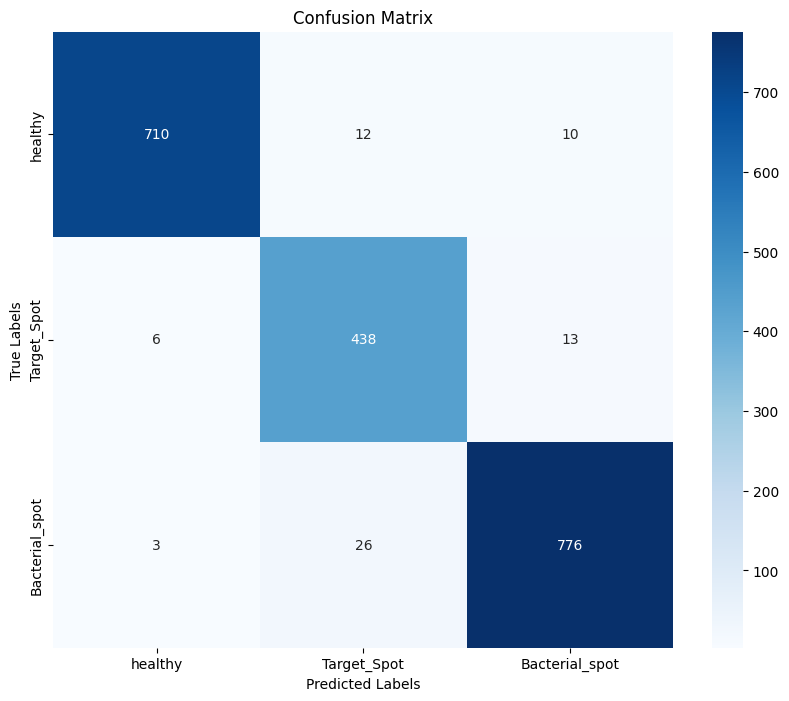

Accuracy: 0.9649
Precision: 0.9655
Recall: 0.9649
F1 Score: 0.9651


In [17]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define test dataset path and class names
test_dir = '/content/valid'  # Replace with the path to your test folder
class_names = ['healthy', 'Target_Spot', 'Bacterial_spot']

# Image size and batch size (match training configuration)
img_size = (256, 256)  # Replace with the image size used during training
batch_size = 32  # Replace with your batch size

# Create a data generator for the test dataset
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',  # Match training configuration
    shuffle=False  # Do not shuffle to align predictions with filenames
)

# Aggregate predictions across all folds
all_predictions = []
all_true_labels = test_generator.classes  # Ground truth labels

for fold in range(1, kf.get_n_splits() + 1):  # kf.get_n_splits() gives the number of folds
    print(f"Loading model for Fold {fold}...")
    model_path = f'/content/checkpoints/fold_{fold}/best_model.keras'  # Adjust path if necessary
    model = tf.keras.models.load_model(model_path)

    # Predict on test data
    print(f"Predicting for Fold {fold}...")
    fold_predictions = model.predict(test_generator, verbose=1)
    fold_predictions = np.argmax(fold_predictions, axis=1)  # Convert to class indices
    all_predictions.append(fold_predictions)

# Average predictions across folds (ensemble approach)
final_predictions = np.round(np.mean(all_predictions, axis=0)).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(all_true_labels, final_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Compute and print metrics
accuracy = accuracy_score(all_true_labels, final_predictions)
precision = precision_score(all_true_labels, final_predictions, average='weighted')
recall = recall_score(all_true_labels, final_predictions, average='weighted')
f1 = f1_score(all_true_labels, final_predictions, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
